# Projet 6 : Analyser les ventes d’une librairie


## 📋 Scénario
Nous sommes consultant Data Analyst rattaché au service Marketing d'une grande librairie généraliste en ligne très réputée. Devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé d’ouvrir un site de vente en ligne. Nous intervenons car l’entreprise souhaite faire le point après deux ans d’exercice.

## 🎯 Objectifs
Obtenir un jeu de données exploitables à partir des fichiers source, puis réaliser une analyse complète : chiffres clés, KPI, graphiques, etc.. Nous réalisons également plusieurs tests statistiques afin de vérifier la corrélation entre différentes variables liées au profil des clients.

## 🔧 Outils utilisés
Pandas : importation, préparation, nettoyage des données.
Pandas et Matplolib : réalisation des analyses et visualisations.
SciPy : tests statistiques (corrélations profil client/comportement)

## 🎓 Compétences acquises
Réaliser un test statistique.
Réaliser une analyse bivariée pour interpréter des données.
Analyser des séries temporelles.

### Import des modules :

In [409]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta
import ast

### Importation des données :

In [411]:
consommateurs = pd.read_csv("./dataset/projet1/customers.csv", sep = ",")
produits = pd.read_csv("./dataset/projet1/products.csv", sep = ",")
transactions = pd.read_csv("./dataset/projet1/transactions.csv", sep = ",")

print(f"La base de données consommateurs a {consommateurs.shape[0]} lignes et {consommateurs.shape[1]} colonnes")
print(f"La base de données produits a {produits.shape[0]} lignes et {produits.shape[1]} colonnes")
print(f"La base de données transactions a {transactions.shape[0]} lignes et {transactions.shape[1]} colonnes")

La base de données consommateurs a 8623 lignes et 3 colonnes
La base de données produits a 3287 lignes et 3 colonnes
La base de données transactions a 679532 lignes et 4 colonnes


### Vérifions si les trois dataframe ont des colonnes en communs :

In [413]:
print("Consommateurs :", list(consommateurs.columns))
print("Produits :", list(produits.columns))
print("Transactions :", list(transactions.columns))

Consommateurs : ['client_id', 'sex', 'birth']
Produits : ['id_prod', 'price', 'categ']
Transactions : ['id_prod', 'date', 'session_id', 'client_id']


### Fusion des dataframes suivant les colonnes en commun :

In [415]:
df_vente = (consommateurs.merge(transactions, on = 'client_id', how='right')).merge(produits, on = 'id_prod', how='left')
df_vente

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_103,f,1986,0_1518,2022-05-20 13:21:29.043970,s_211425,4.18,0.0
1,c_8534,m,1988,1_251,2022-02-02 07:55:19.149409,s_158752,15.99,1.0
2,c_6714,f,1968,0_1277,2022-06-18 15:44:33.155329,s_225667,7.99,0.0
3,c_6941,m,2000,2_209,2021-06-24 04:19:29.835891,s_52962,69.99,2.0
4,c_4232,m,1980,0_1509,2023-01-11 08:22:08.194479,s_325227,4.99,0.0
...,...,...,...,...,...,...,...,...
679527,c_8489,f,1951,0_1551,2022-01-15 13:05:06.246925,s_150195,12.99,0.0
679528,c_4370,f,1977,1_639,2022-03-19 16:03:23.429229,s_181434,10.99,1.0
679529,c_304,f,1988,0_1425,2022-12-20 04:33:37.584749,s_314704,12.99,0.0
679530,c_2227,m,1986,0_1994,2021-07-16 20:36:35.350579,s_63204,4.98,0.0


### Renommage des colonnes du dataframe :

In [417]:
df_vente = df_vente.rename(columns = {'client_id': 'id_client', 'sex': 'sexe', 'birth': 'annee_naissance','id_prod' : 'id_produit','date': 'date_achat','session_id': 'id_session', 'price': 'prix', 'categ': 'categorie'})
df_vente

,id_client,sexe,annee_naissance,id_produit,date_achat,id_session,prix,categorie
0,c_103,f,1986,0_1518,2022-05-20 13:21:29.043970,s_211425,4.18,0.0
1,c_8534,m,1988,1_251,2022-02-02 07:55:19.149409,s_158752,15.99,1.0
2,c_6714,f,1968,0_1277,2022-06-18 15:44:33.155329,s_225667,7.99,0.0
3,c_6941,m,2000,2_209,2021-06-24 04:19:29.835891,s_52962,69.99,2.0
4,c_4232,m,1980,0_1509,2023-01-11 08:22:08.194479,s_325227,4.99,0.0
...,...,...,...,...,...,...,...,...
679527,c_8489,f,1951,0_1551,2022-01-15 13:05:06.246925,s_150195,12.99,0.0
679528,c_4370,f,1977,1_639,2022-03-19 16:03:23.429229,s_181434,10.99,1.0
679529,c_304,f,1988,0_1425,2022-12-20 04:33:37.584749,s_314704,12.99,0.0
679530,c_2227,m,1986,0_1994,2021-07-16 20:36:35.350579,s_63204,4.98,0.0


### Supressions des colonnes inutiles :

In [419]:
df_vente = df_vente.drop('id_session', axis = 1)
df_vente

,id_client,sexe,annee_naissance,id_produit,date_achat,prix,categorie
0,c_103,f,1986,0_1518,2022-05-20 13:21:29.043970,4.18,0.0
1,c_8534,m,1988,1_251,2022-02-02 07:55:19.149409,15.99,1.0
2,c_6714,f,1968,0_1277,2022-06-18 15:44:33.155329,7.99,0.0
3,c_6941,m,2000,2_209,2021-06-24 04:19:29.835891,69.99,2.0
4,c_4232,m,1980,0_1509,2023-01-11 08:22:08.194479,4.99,0.0
...,...,...,...,...,...,...,...
679527,c_8489,f,1951,0_1551,2022-01-15 13:05:06.246925,12.99,0.0
679528,c_4370,f,1977,1_639,2022-03-19 16:03:23.429229,10.99,1.0
679529,c_304,f,1988,0_1425,2022-12-20 04:33:37.584749,12.99,0.0
679530,c_2227,m,1986,0_1994,2021-07-16 20:36:35.350579,4.98,0.0


### Vérifions et changeons au besoin le types de nos variables (colonnes) :

In [421]:
df_vente.dtypes

df_vente['sexe'] = df_vente['sexe'].astype('category')
df_vente['categorie'] = df_vente['categorie'].astype('category')
df_vente['date_achat'] = pd.to_datetime(df_vente['date_achat'])

ValueError: time data "test_2021-03-01 02:30:02.237419" doesn't match format "%Y-%m-%d %H:%M:%S.%f", at position 3019. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Nous avons une erreur qui nous indique qu'une valeur de la colonne 'date_achat' commence par 'test'. Nous allons accéder à cette ligne et la modifier afin de pouvoir changer le format de la colonne.


In [423]:
pb = df_vente['date_achat'].str.startswith("test_", na=False)
df_vente[pb]

,id_client,sexe,annee_naissance,id_produit,date_achat,prix,categorie
3019,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237419,-1.0,0.0
5138,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237425,-1.0,0.0
9668,ct_1,m,2001,T_0,test_2021-03-01 02:30:02.237437,-1.0,0.0
10728,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237436,-1.0,0.0
15292,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237430,-1.0,0.0
...,...,...,...,...,...,...,...
657830,ct_0,f,2001,T_0,test_2021-03-01 02:30:02.237417,-1.0,0.0
662081,ct_1,m,2001,T_0,test_2021-03-01 02:30:02.237427,-1.0,0.0
670680,ct_1,m,2001,T_0,test_2021-03-01 02:30:02.237449,-1.0,0.0
671647,ct_1,m,2001,T_0,test_2021-03-01 02:30:02.237424,-1.0,0.0


On constate qu'au moins 200 lignes sont mal formatées pour la date d'achat. On peut aussi voir que pour ces lignes, on a des prix négatifs et on ne possède ni l'id du client ni l'id du produit. Ces lignes ne sont donc pas pertinentes pour l'analyse, nous devrons les supprimer. 

In [425]:
df_vente = df_vente[~df_vente['id_client'].str.contains('ct', na=False)]
df_vente = df_vente[~df_vente['id_produit'].str.contains('T_', na=False)]
df_vente = df_vente[~df_vente['date_achat'].str.contains('test', na=False)]
df_vente = df_vente[df_vente['prix'] >= 0]


### Essayons à nouveau de changer le type des colonnes :

In [427]:
df_vente['sexe'] = df_vente['sexe'].astype('category')
df_vente['categorie'] = df_vente['categorie'].astype('category')
df_vente['date_achat'] = pd.to_datetime(df_vente['date_achat'])

df_vente.dtypes

id_client                  object
sexe                     category
annee_naissance             int64
id_produit                 object
date_achat         datetime64[ns]
prix                      float64
categorie                category
dtype: object

### Creation des colonnes : jour_achat, mois_achat, annee_achat

In [429]:
# Extraire le jour, le mois et l'année
df_vente['jour_achat'] = df_vente['date_achat'].dt.day
df_vente['mois_achat'] = df_vente['date_achat'].dt.month
df_vente['annee_achat'] = df_vente['date_achat'].dt.year

# Extraire le mois et l'année sous forme "MM-YYYY"
df_vente['mois_annee'] = df_vente['date_achat'].dt.to_period('M').astype(str)

In [431]:
df_vente['jour_achat'] = df_vente['jour_achat'].astype(str)
df_vente['mois_achat'] = df_vente['mois_achat'].astype(str)
df_vente['annee_achat'] = df_vente['annee_achat'].astype(str)

### Vérifications de la présence de valeurs manquantes

In [433]:
total = df_vente.isna().sum()
print(total)

id_client          0
sexe               0
annee_naissance    0
id_produit         0
date_achat         0
prix               0
categorie          0
jour_achat         0
mois_achat         0
annee_achat        0
mois_annee         0
dtype: int64


### QUESTIONS AUXQUELLES NOUS ALLONS REPONDRE

**Afin de faire le point sur l'exercice de ces deux années, voici les questions qu'on pourrait se poser** :

- Quelle a été notre chiffre d'affaire au cours de ces dernières années ? Le chiffre d'affaire mensuel ? Il y a t'il des tendances qui se dégagent ? (Des jours ou mois où les achats sont particulièrement élevés. Cela peut orienter des initiatives de promotions.)
- Quels sont nos 10 meilleurs clients (ceux qui achètent le plus)
- Quels sont les 10 produits les plus achetés ? Les 10 produits les plus achetés par sexe ? Par catégories ?
- Quelle est la categorie de produit la plus demandée ? 
- Quelle est la clientèle dominante ? ( Femme ou Homme) Quelle catégorie de livre achètent t'elles le plus ?  
- Quelle est la/les génération(s) dominante(s) ? Quelle est la categorie qu'elle achète le plus ?

### 1. Focus sur le chiffre d'affaire 

#### 1.1. Chiffre d'affaire par année (en Euros)

In [435]:
df = df_vente.groupby(['annee_achat'])['prix'].sum().reset_index()

for i, ligne in df.iterrows():
    print(ligne['annee_achat'], ":", round(ligne['prix'] / 1000, 3), 'k€')


2021 : 4770.827 k€
2022 : 6108.682 k€
2023 : 974.22 k€


C:\Users\conra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


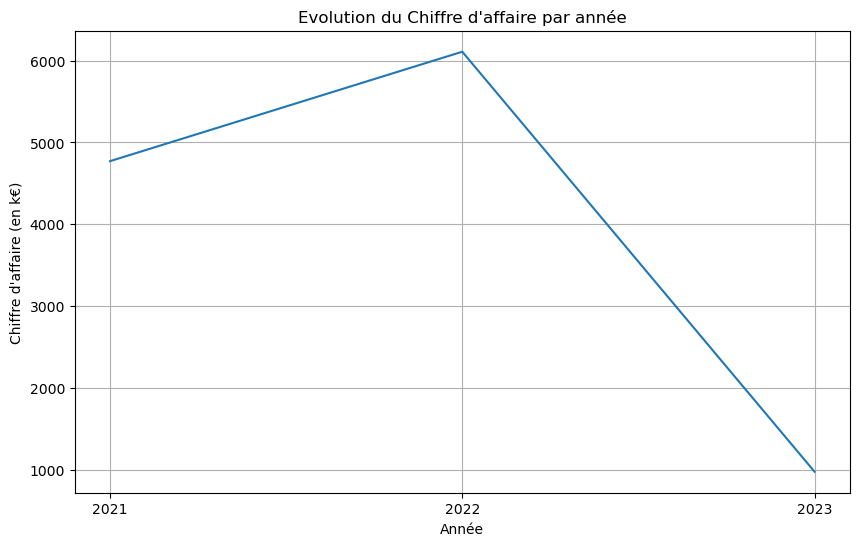

In [437]:
# Regrouper les données par année et sommer les prix
df_grouped = df_vente.groupby('annee_achat', as_index=False)['prix'].sum()
df_grouped['prix'] = df_grouped['prix'] / 1000

# Tracer la courbe
plt.figure(figsize=(10,6))
sns.lineplot(data=df_grouped, x='annee_achat', y='prix')
plt.ylabel("Chiffre d'affaire (en k€)")
plt.xlabel('Année')
plt.grid()
plt.title("Evolution du Chiffre d'affaire par année")
plt.show()

On a l'impression que le chiffre d'affaire de l'entreprise a connu une baisse très inquiétante entre 2022 et 2023. Mais l'activité en 2023 a pris fin en février. Voyons cette évolution par mois.

#### 1.2. Chiffre d'affaire par mois

In [439]:
df = df_vente.groupby(['mois_annee'])['prix'].sum().reset_index()

for i, ligne in df.iterrows():
    print(ligne['mois_annee'], ":", round(ligne['prix'] / 1000, 3), 'k€')

2021-03 : 482.441 k€
2021-04 : 476.109 k€
2021-05 : 492.943 k€
2021-06 : 484.089 k€
2021-07 : 482.835 k€
2021-08 : 482.285 k€
2021-09 : 507.241 k€
2021-10 : 320.799 k€
2021-11 : 516.168 k€
2021-12 : 525.917 k€
2022-01 : 525.339 k€
2022-02 : 535.572 k€
2022-03 : 515.457 k€
2022-04 : 492.999 k€
2022-05 : 517.133 k€
2022-06 : 496.016 k€
2022-07 : 510.783 k€
2022-08 : 506.467 k€
2022-09 : 494.115 k€
2022-10 : 507.918 k€
2022-11 : 496.665 k€
2022-12 : 510.219 k€
2023-01 : 517.541 k€
2023-02 : 456.68 k€


C:\Users\conra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


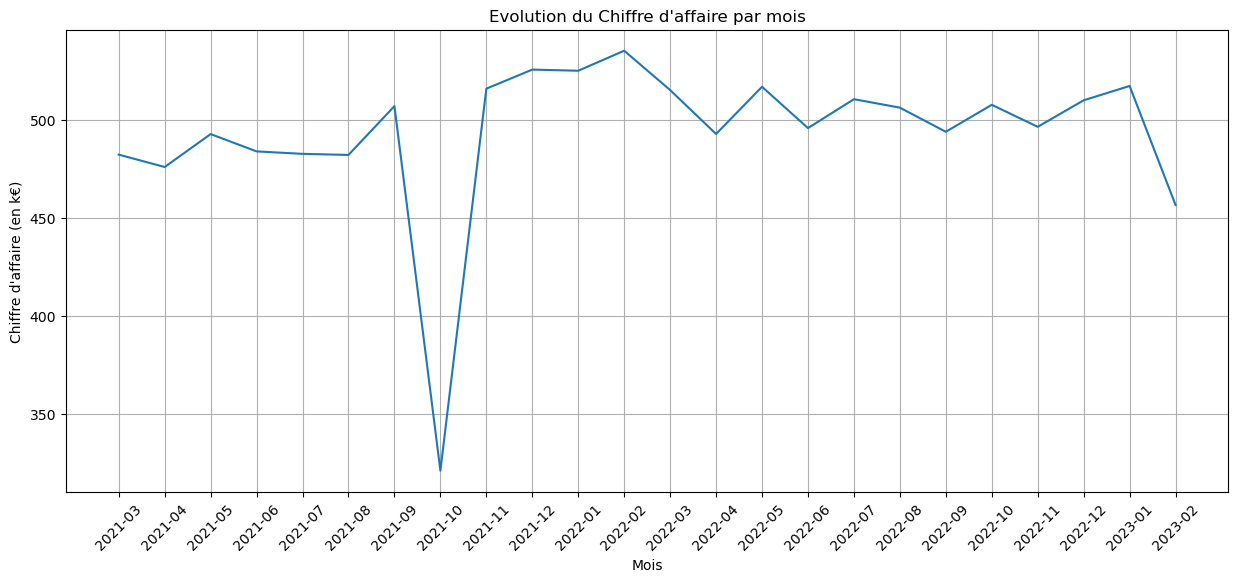

In [441]:
# Regrouper les données par année et sommer les prix
df_grouped = df_vente.groupby(['mois_annee'], as_index=False)['prix'].sum()
df_grouped['prix'] = df_grouped['prix'] / 1000

# Tracer la courbe
plt.figure(figsize=(15,6))
sns.lineplot(data=df_grouped, x='mois_annee', y='prix')
plt.ylabel("Chiffre d'affaire (en k€)")
plt.xlabel('Mois')
plt.xticks(rotation=45)  # Rotation de 45 degrés
plt.grid()
plt.title("Evolution du Chiffre d'affaire par mois")
plt.show()

On peut voir qu'il n'y a pas une baisse importante de 2022 à 2023. Cependant en octobre 2021, l'entreprise a perdu près du 3/4 de ses ventes. 

#### 1.3. Chiffre d'affaire par categorie 

In [443]:
df = df_vente.groupby(['categorie'], observed=False)['prix'].sum().reset_index()
for i, ligne in df.iterrows():
    print('Categorie',ligne['categorie'], ":", round(ligne['prix'] / 1000, 3), 'k€')

Categorie 0.0 : 4419.731 k€
Categorie 1.0 : 4653.723 k€
Categorie 2.0 : 2780.275 k€


C:\Users\conra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wil

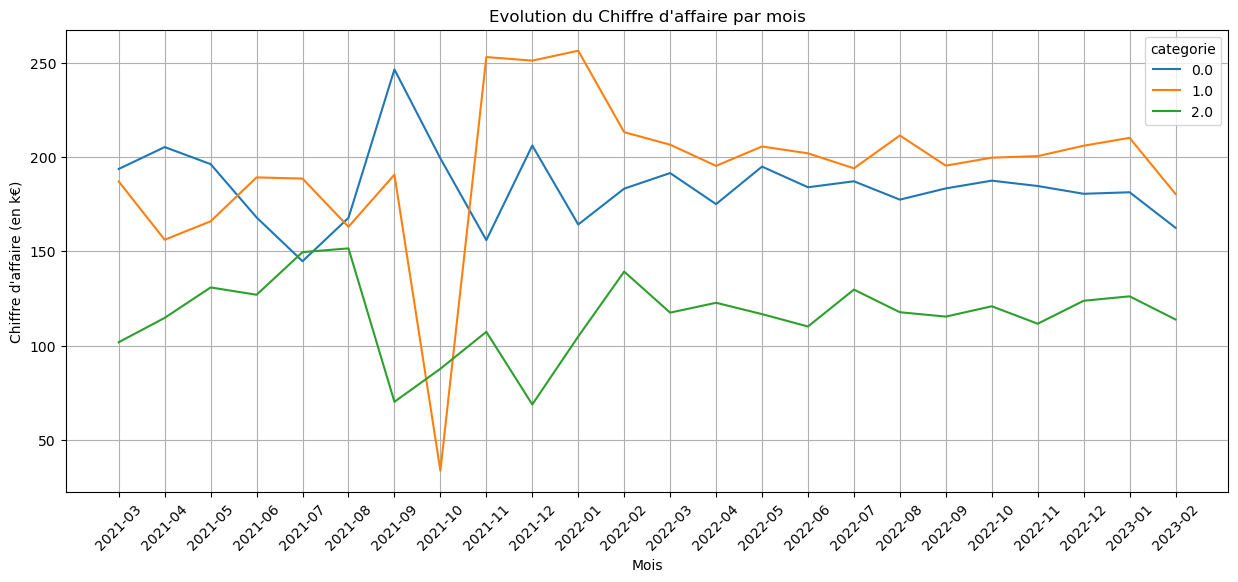

In [445]:
df = df_vente.groupby(['mois_annee', 'categorie'], observed=False)['prix'].sum().reset_index()
df['prix'] = df['prix'] / 1000

plt.figure(figsize = (15,6))
sns.lineplot(data = df, x = 'mois_annee', y = 'prix', hue = 'categorie')
plt.ylabel("Chiffre d'affaire (en k€)")
plt.xlabel('Mois')
plt.xticks(rotation=45)  # Rotation de 45 degrés
plt.grid()
plt.title("Evolution du Chiffre d'affaire par mois")
plt.show()

On constate aisément que la baise du chiffre d'affaire en octobre 2021 est du à la baisse d'achat de la catégorie 1. Nous aurons plus d'explications avec l'analyse croisée des clients

### 2. Analyse des clients

#### 2.1. Nos 10 meilleurs clients

In [447]:
df = df_vente.groupby('id_client')['prix'].sum().reset_index()
df = df.sort_values(by = 'prix', ascending=False)
df

j = 1
for i, client in (df.head(10)).iterrows():
    print(f'Client {j} :', client['id_client'], '(',round(client['prix'],2),'k€)')
    j += 1

Client 1 : c_1609 ( 324033.35 k€)
Client 2 : c_4958 ( 289760.34 k€)
Client 3 : c_6714 ( 153598.92 k€)
Client 4 : c_3454 ( 113637.93 k€)
Client 5 : c_3263 ( 5276.87 k€)
Client 6 : c_1570 ( 5271.62 k€)
Client 7 : c_2899 ( 5214.05 k€)
Client 8 : c_2140 ( 5208.82 k€)
Client 9 : c_7319 ( 5155.77 k€)
Client 10 : c_7959 ( 5085.45 k€)


#### 2.2. La clientèle dominante (par sexe)

C:\Users\conra\AppData\Local\Temp\ipykernel_9544\189123563.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2, x='sexe', y='id_client', ci=None, ax=axes[0])
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


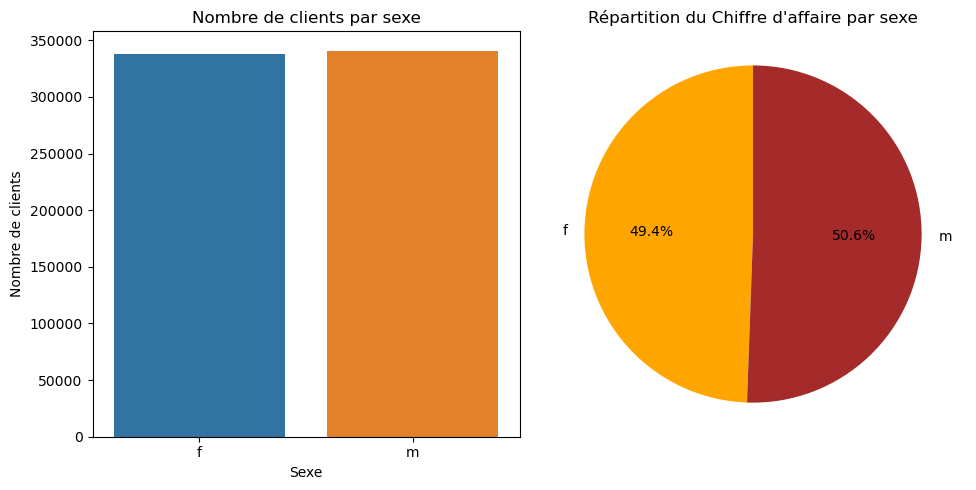

In [449]:
df = df_vente.groupby('sexe', observed = False)['prix'].sum().reset_index()
df2 = df_vente.groupby('sexe', observed = False).count().reset_index()

# Créer les sous-graphiques (2 colonnes, 1 ligne)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(data=df2, x='sexe', y='id_client', ci=None, ax=axes[0])
axes[0].set_title("Nombre de clients par sexe")
axes[0].set_xlabel("Sexe")
axes[0].set_ylabel("Nombre de clients")

axes[1].pie(df['prix'], labels=df['sexe'], autopct='%1.1f%%', startangle=90, colors=('orange', 'brown'))
axes[1].set_title("Répartition du Chiffre d'affaire par sexe")
axes[1].axis('equal')  

plt.tight_layout()
plt.show()


Le chiffre d'affaire de l'entreprise au cours des 2 années et presque équitablement répartie entre les hommes et les femmes. On peut aussi voir qu'on a presque autant de client femme que d'homme. 

#### 2.3. Categorie de livre la plus achetée par sexe

In [451]:
df_vente.pivot_table(index = 'sexe', columns = 'categorie', values = 'id_client', aggfunc = 'count')

C:\Users\conra\AppData\Local\Temp\ipykernel_9544\488541206.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_vente.pivot_table(index = 'sexe', columns = 'categorie', values = 'id_client', aggfunc = 'count')


categorie,0.0,1.0,2.0
sexe,,,
f,206103,114899,17283
m,209356,112270,19200


Les hommes achètent plus les livres de catégories 0 et 2, alors que les femmes achètent plus les livres de catégorie 1. 

#### 2.5. Génération dominante de client

C:\Users\conra\AppData\Local\Temp\ipykernel_9544\1669339622.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='classe_age', y='prix', ci=None, hue = 'sexe')
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


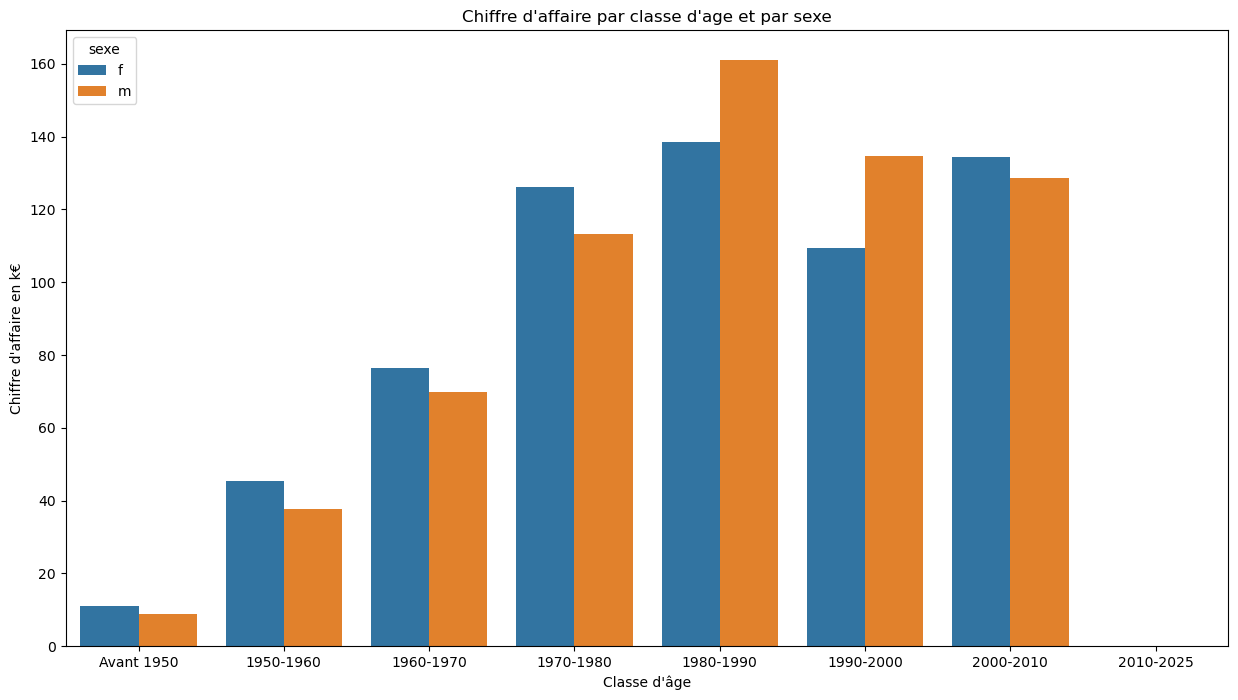

In [453]:
df = df_vente.groupby(['sexe','annee_naissance'], observed =False)['prix'].sum().reset_index()
df['annee_naissance'] = df['annee_naissance'].astype('int')
df['prix'] = df['prix'] / 1000

bins = [1920, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2025] 
labels = ['Avant 1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2025']

df['classe_age'] = pd.cut(df['annee_naissance'], bins=bins, labels=labels, right=False)

plt.figure(figsize =(15,8))
sns.barplot(data=df, x='classe_age', y='prix', ci=None, hue = 'sexe')
plt.title("Chiffre d'affaire par classe d'age et par sexe")
plt.xlabel("Classe d'âge")
plt.ylabel("Chiffre d'affaire en k€")
plt.show()

On constate que les personnes nées entre 1980 et 1990 constituent une par importante de notre chiffre d'affaire, suivi par les 2000 - 2010, les 1990 - 2000 et les 1970 - 1980. On peut voir aussi dans chacune de ces classes, qui des hommes ou des contribuent le plus au CA. 

### 3. Analyse des catégories de livre

#### 3.1 Cagégorie la plus achetée

C:\Users\conra\AppData\Local\Temp\ipykernel_9544\3643276080.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='categorie', y='id_client', ci=None)


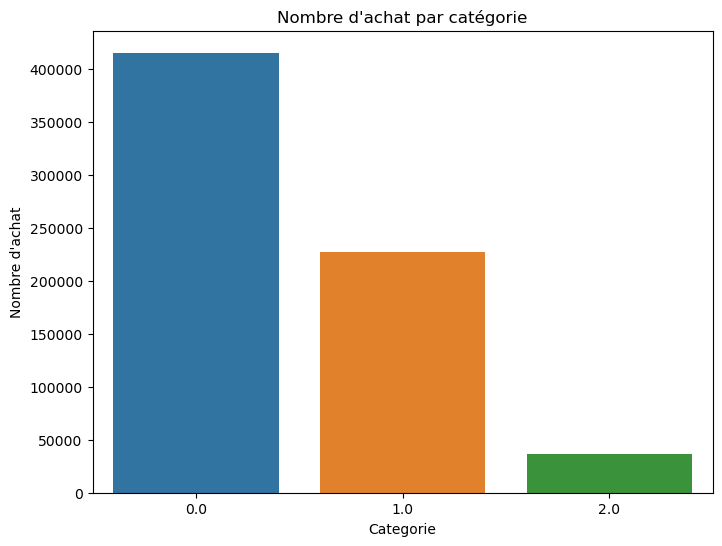

In [455]:
df_vente['categorie'] = df_vente['categorie'].astype('str')
df = df_vente.groupby(['categorie'], observed =False)['id_client'].count().reset_index()

plt.figure(figsize =(8,6))
sns.barplot(data=df, x='categorie', y='id_client', ci=None)
plt.title("Nombre d'achat par catégorie")
plt.xlabel("Categorie")
plt.ylabel("Nombre d'achat")
plt.show()

La catégorie la plus achetée (fréquence) est la catégorie 0.

#### 3.2. Cagégorie la plus achetée par classe d'âge

C:\Users\conra\AppData\Local\Temp\ipykernel_9544\287857604.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='classe_age', y='id_client', ci=None, hue = 'categorie')
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))
C:\Users\conra\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


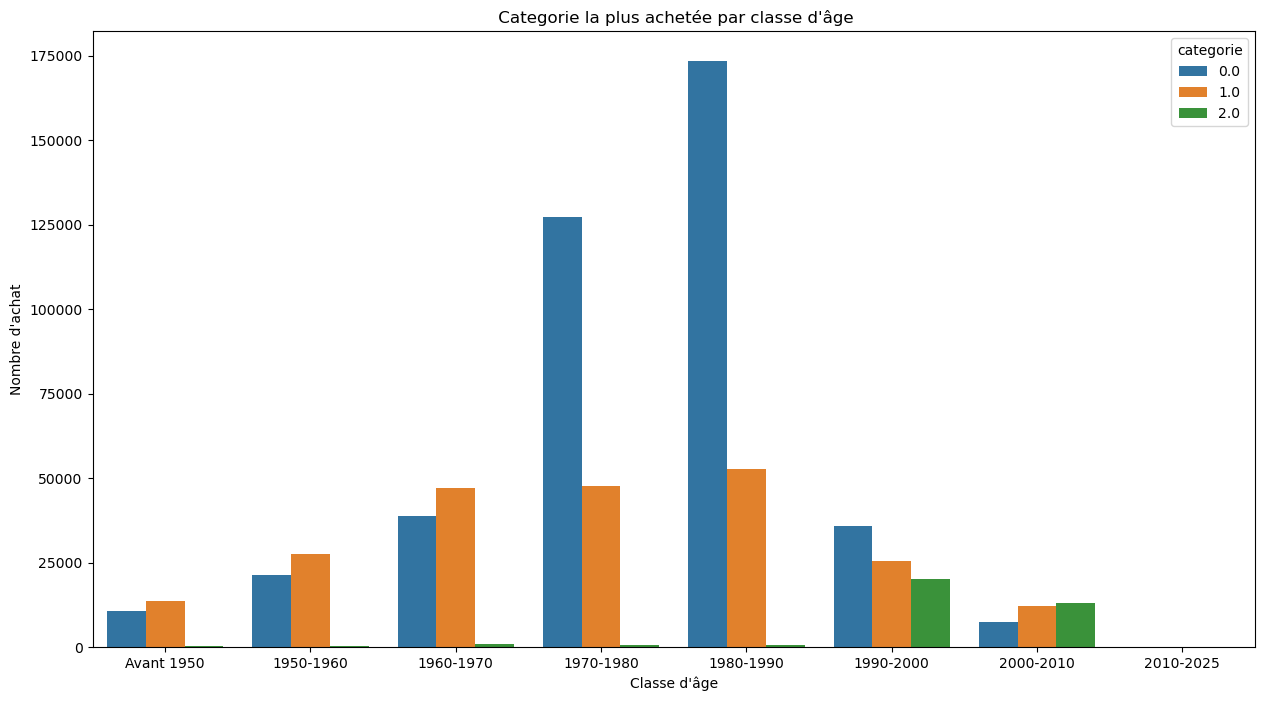

In [457]:
df = df_vente.groupby(['categorie','annee_naissance'], observed =False)['id_client'].count().reset_index()
df['annee_naissance'] = df['annee_naissance'].astype('int')
df['categorie'] = df['categorie'].astype('str')

bins = [1920, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2025] 
labels = ['Avant 1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2025']

df['classe_age'] = pd.cut(df['annee_naissance'], bins=bins, labels=labels, right=False)

df = df.drop('annee_naissance', axis = 1)
df = df.groupby(['classe_age', 'categorie'], observed =False)['id_client'].sum().reset_index()

plt.figure(figsize =(15,8))
sns.barplot(data=df, x='classe_age', y='id_client', ci=None, hue = 'categorie')
plt.title(" Categorie la plus achetée par classe d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("Nombre d'achat")
plt.show()

#### 3.3. Categorie la plus achetée par sexe

C:\Users\conra\AppData\Local\Temp\ipykernel_9544\1294346287.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='categorie', y='id_client', ci=None, hue = 'sexe')


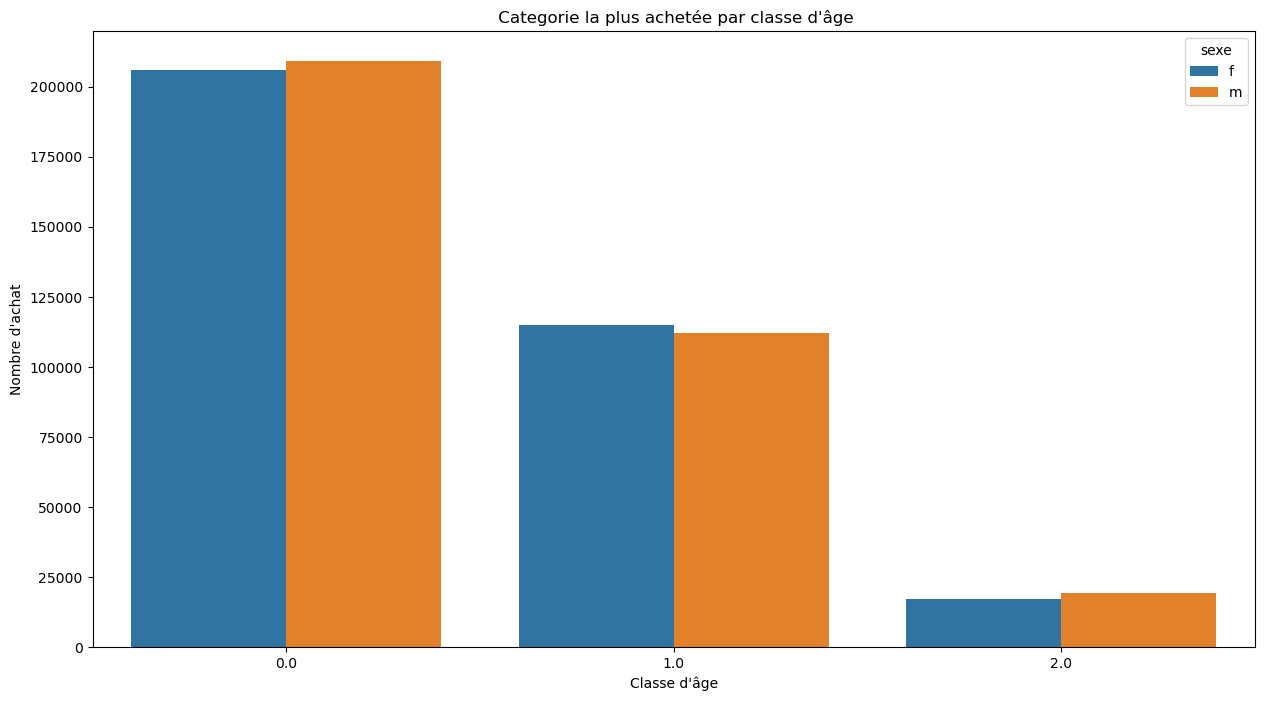

In [459]:
df_vente['categorie'] = df_vente['categorie'].astype('str')
df = df_vente.groupby(['categorie','sexe'], observed =False)['id_client'].count().reset_index()


plt.figure(figsize =(15,8))
sns.barplot(data=df, x='categorie', y='id_client', ci=None, hue = 'sexe')
plt.title(" Categorie la plus achetée par classe d'âge")
plt.xlabel("Classe d'âge")
plt.ylabel("Nombre d'achat")
plt.show()

Il n'y a pas de différences significatives entre l'achat d'une catégorie d'un sexe à l'autre

#### 3.4. Catégorie rapportant le plus d'argent

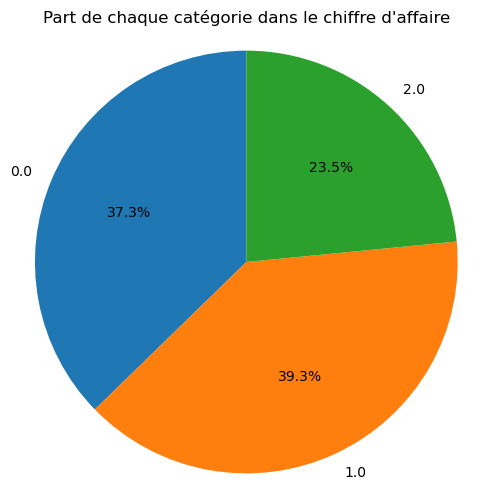

In [461]:
df_vente['categorie'] = df_vente['categorie'].astype('str')
df = df_vente.groupby(['categorie'], observed =False)['prix'].sum().reset_index()

plt.figure(figsize =(6,6))
plt.pie(df['prix'], labels=df['categorie'], autopct='%1.1f%%', startangle=90)
plt.title("Part de chaque catégorie dans le chiffre d'affaire")
plt.axis('equal') 
plt.show()

La categorie rapportant le plus d'argent est la catégorie 1. On comprends alors pourquoi la chute des ventes de cette catégorie en octobre 2021 a fait chutté le chiffre d'affaire durant ce mois. La catégorie 0, malgré le fait qu'elle soit la plus vendue contribue en deuxième au chiffe d'affaire. 

### 4. Focus Produits